
<center>
    <b>Administración de Portafolios de Inversión</b><br>
    <b>Docente: Julio César Galindo López </b>
<br><br>
<br>    
    <font size="5" color="green">Simulaciones de procesos GARCH</font>
</center>


**Preliminares**

In [ ]:
# NumPy es una biblioteca de Python que proporciona soporte para matrices y arrays multidimensionales de gran tamaño,
# así como una amplia gama de operaciones matemáticas que se pueden realizar en estos arrays.
!pip install numpy
# Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.
# Las principales características de esta librería son: Define nuevas estructuras de datos basadas en los arrays de la
# librería NumPy pero con nuevas funcionalidades.
!pip install pandas
# La librería matplotlib es utilizada para crear visualizaciónes estatícas, animadas e interactivas en python.
# Proporciona una API orientada a objetos para incrustar gráficos en aplicaciones que utilizan kits de herramientas GUI de uso general.
!pip install matplotlib

In [ ]:
# Los modelos ARCH son una clase popular de modelos de volatilidad que utilizan los valores observados de rendimientos
# o residuales como perturbaciones de volatilidad.
!pip install arch

In [ ]:
import numpy as np
import pandas as pd
import arch
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
from matplotlib import style
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
# Ajustes para escoger los estilos de los gráficos
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (16, 4)

# Simulación de procesos ARCH


In [ ]:
# Elnúmero de observaciones
variable_t = 1000
# Ruido blanco con varianza σ^2
u = np.random.randn(variable_t)
# Guardamos los resultados en un data frame
datos = pd.DataFrame({'u':u})
# Número de simulaciones de MonteCarlo a realizar
n_simulaciones = 1000
datos

,u
0,-0.187491
1,0.126474
2,1.543241
3,0.315892
4,-0.460370
...,...
995,-0.762014
996,-0.841764
997,1.841786
998,0.303737


## MODELOS ARCH(1)
### Está definido por las dos ecuaciones
\begin{align}
y_t &= 10 + \epsilon_t \\
\epsilon_t &= u_t\sqrt{0.4 + 0.9\epsilon^2_{t-1}}
\end{align}

### Simulación MONTE CARLO

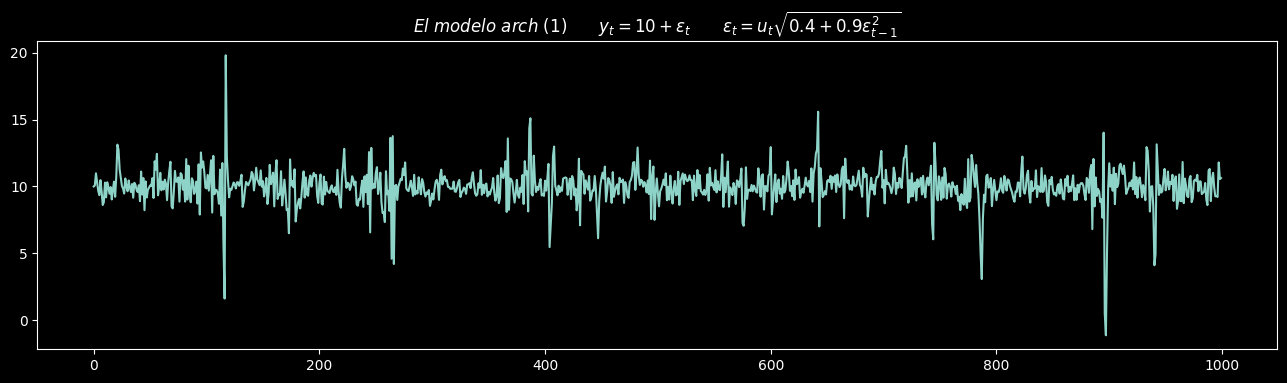

In [ ]:
c, alpha = 10, (0.4, 0.9)
# Término epsilon para el error
e = np.zeros_like(u)
for t in range(1,variable_t):
    e[t] = u[t] * np.sqrt(alpha[0] + alpha[1] * e[t-1]**2)

x = c + e

datos['x'] = x

ax = datos['x'].plot()
# El modelo arch (1)
ax.set_title("$El \ modelo \ arch \ (1)\ \ \ \ \ \ y_t = 10 + \epsilon_t \qquad \epsilon_t = u_t\sqrt{0.4 + 0.9\epsilon^2_{t-1}}$");

$El \ modelo \ arch \ (1)\  \ \ y_t = 10 + \epsilon_t \qquad \epsilon_t = u_t\sqrt{0.4 + 0.9\epsilon^2_{t-1}}$

### Diagnóstico para la autocorrelación de ARCH(1)

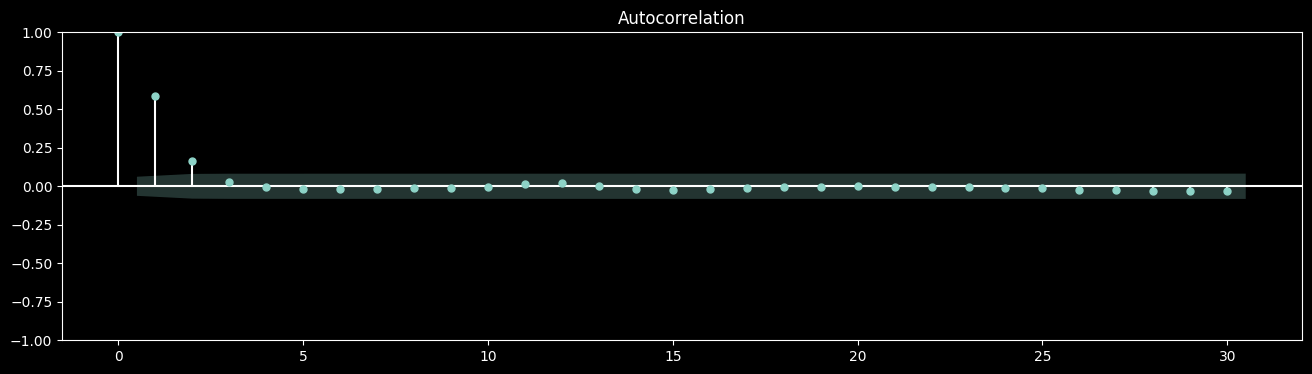

In [ ]:
datos['ex'] = ols('x~1', datos).fit().resid
datos['e2x'] = datos['ex']**2

ax = plot_acf(datos['e2x'])

### Estimación para los valores de los coefcientes de ARCH(1)

In [ ]:
modelo = arch.arch_model(datos['x'], mean='Constant', vol='arch')
resultados= modelo.fit()
resultados.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 5171.825969986546
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3337.1051416441696
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1372.7003381084241
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1372.5113769876084
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1370.9024858462426
Iteration:      6,   Func. Count:     34,   Neg. LLF: 1370.9024820456837
Iteration:      7,   Func. Count:     37,   Neg. LLF: 1370.9024820456793
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1370.9024820456837
            Iterations: 7
            Function evaluations: 37
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                      x   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1370.90
Distribution:                  Normal   AIC:                           2747.80
Method:            Maximum Likelihood   BIC:                           2762.53
                                        No. Observations:                 1000
Date:                Sat, Nov 25 2023   Df Residuals:                      999
Time:                        14:34:10   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            10.0230  2.176e-02    460.511      0.000 [  9.980, 10.066]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.3818  2.975e-02     12.832  1.088e-37 [  0.323,  0.440]
alpha[1]       0.8440  8.349e-02     10.109  5.045e-24 [  0.680,  1.008]
========================================================================

Covariance estimator: robust
"""

## AR(1)-ARCH(1)

\begin{align}
y_t &= 1 + 0.9y_{t-1} + \epsilon_t \\
\epsilon_t &= u_t\sqrt{0.4 + 0.5\epsilon^2_{t-1}}
\end{align}

### Simulación

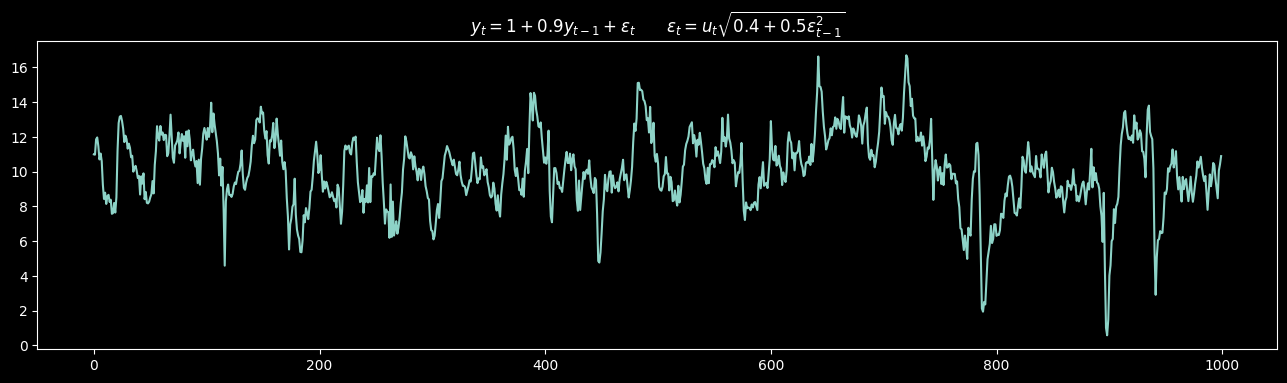

In [ ]:
c, phi, alpha = 1, 0.9, (0.4, 0.5)
# Término epsilon para el error
e = np.zeros_like(u)
y = 11 + e

for t in range(1,variable_t):
    e[t] = u[t] * np.sqrt(alpha[0] + alpha[1] * e[t-1]**2)
    y[t] = c + phi*y[t-1] + e[t]


datos['y'] = y

ax = datos['y'].plot()
ax.set_title("$y_t = 1 + 0.9y_{t-1} + \epsilon_t \qquad \epsilon_t = u_t\sqrt{0.4 + 0.5\epsilon^2_{t-1}}$");

$El \ modelo \ ar(1) \ \ arch \ (1)\  \ \ y_t = 1 + 0.9y_{t-1} + \epsilon_t \qquad \epsilon_t = u_t\sqrt{0.4 + 0.5\epsilon^2_{t-1}}$

### Diagnóstico para la autocorrelación de AR(1)-ARCH(1)

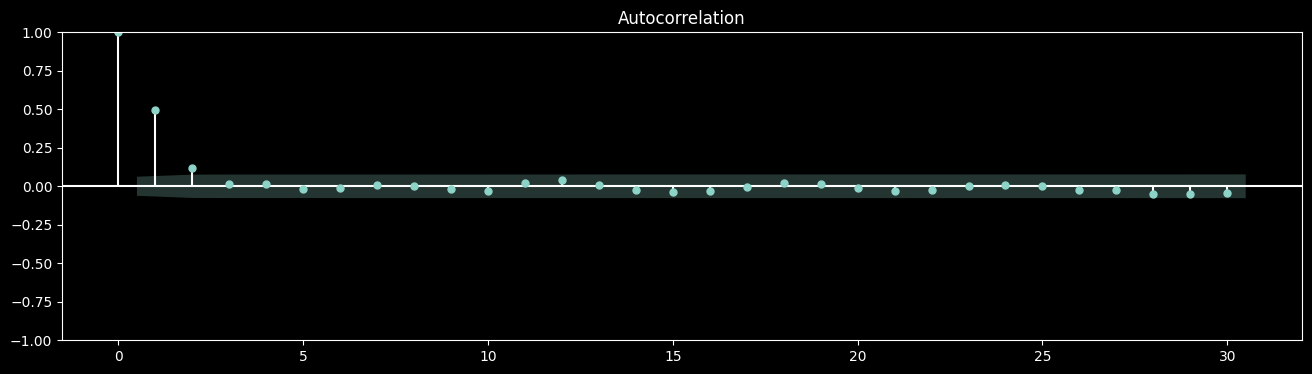

In [ ]:
datos['Ly'] = datos['y'].shift(1)
datos['ey'] = np.nan
datos.loc[1:, 'ey'] = ols('y~ Ly', datos.iloc[1:]).fit().resid
datos['e2y'] = datos['ey']**2

ax = plot_acf(datos['e2y'].dropna())

### Estimación para los valores de los coefcientes AR(1)-ARCH(1)

In [ ]:
modelo= arch.arch_model(datos['y'], mean='AR',lags=1, vol='arch', )
results=modelo.fit()
results.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 800446321364515.8
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4010026279.570645
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1838.3448627334947
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1336.86217983815
Iteration:      5,   Func. Count:     41,   Neg. LLF: 1163.9753368901706
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1163.9752235728988
Iteration:      7,   Func. Count:     50,   Neg. LLF: 1163.9752235729052
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1163.9752235728988
            Iterations: 7
            Function evaluations: 50
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.833
Mean Model:                        AR   Adj. R-squared:                  0.832
Vol Model:                       ARCH   Log-Likelihood:               -1163.98
Distribution:                  Normal   AIC:                           2335.95
Method:            Maximum Likelihood   BIC:                           2355.58
                                        No. Observations:                  999
Date:                Sat, Nov 25 2023   Df Residuals:                      997
Time:                        15:51:19   Df Model:                            2
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          1.0418      0.129      8.082  6.351e-16 [  0.789,  1.294]
y[1]           0.8982  1.222e-02     73.517      0.000 [  0.874,  0.922]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.3730  2.539e-02     14.690  7.440e-49 [  0.323,  0.423]
alpha[1]       0.4912  6.659e-02      7.377  1.616e-13 [  0.361,  0.622]
========================================================================

Covariance estimator: robust
"""

## ARCH(2)

\begin{align}
x_t &= 10 + \epsilon_t \\
\epsilon_t &= u_t\sqrt{0.2 + 0.3\epsilon^2_{t-1} + 0.4\epsilon^2_{t-2}}
\end{align}

### Simulación

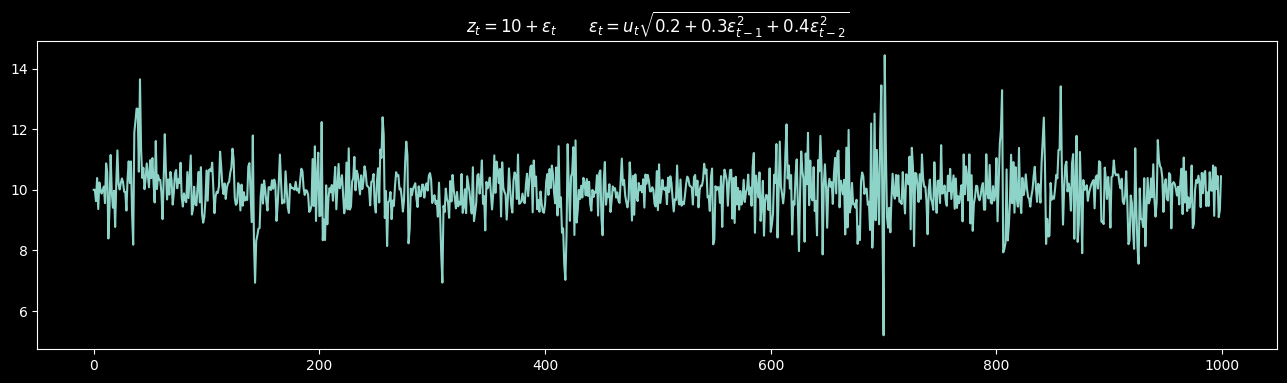

In [ ]:
c, alpha = 10, (0.2, 0.3, 0.4)
# Término epsilon para el error
e = np.zeros_like(u)
for t in range(2,variable_t):
    e[t] = u[t] * np.sqrt(alpha[0] + alpha[1] * e[t-1]**2 + alpha[2] * e[t-2]**2)

z = c + e

datos['z'] = z

ax = datos['z'].plot()
ax.set_title("$z_t = 10 + \epsilon_t \qquad \epsilon_t = u_t\sqrt{0.2 + 0.3\epsilon^2_{t-1} + 0.4\epsilon^2_{t-2}}$");

$El \ modelo \ arch \ (2)\  \ \ z_t = 10 + \epsilon_t \qquad \epsilon_t = u_t\sqrt{0.2 + 0.3\epsilon^2_{t-1} + 0.4\epsilon^2_{t-2}}$

### Diagnóstico para la autocorrelación de ARCH(2)

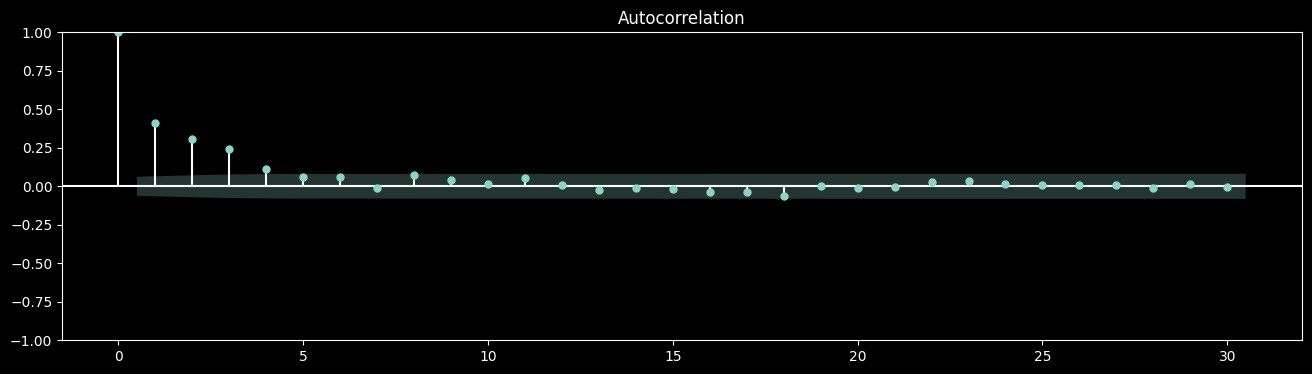

In [ ]:
datos['ez'] = ols('z~1', datos).fit().resid
datos['e2z'] = datos['ez']**2

ax = plot_acf(datos['e2z'])

### Estimación para los valores de los coefcientes ARCH(2)

In [ ]:
model= arch.arch_model(datos['z'], mean='Constant', vol='arch', p=2)
resultados=model.fit()
resultados.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4710.043907877252
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1722.2609599243497
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1108.5938889530364
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1077.9474312434431
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1077.257166478731
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1073.672425722107
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1073.6721363071586
Iteration:      8,   Func. Count:     51,   Neg. LLF: 1073.6721363073511
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1073.6721363071586
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                      z   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1073.67
Distribution:                  Normal   AIC:                           2155.34
Method:            Maximum Likelihood   BIC:                           2174.98
                                        No. Observations:                 1000
Date:                Sat, Nov 25 2023   Df Residuals:                      999
Time:                        04:47:10   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             9.9968  1.789e-02    558.711      0.000 [  9.962, 10.032]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.1957  2.192e-02      8.929  4.294e-19 [  0.153,  0.239]
alpha[1]       0.3884  5.931e-02      6.548  5.837e-11 [  0.272,  0.505]
alpha[2]       0.3959  6.424e-02      6.162  7.163e-10 [  0.270,  0.522]
========================================================================

Covariance estimator: robust
"""

## GARCH(1,1)

\begin{align}
w_t &= 10 + \epsilon_t \\
\epsilon_t &= u_t\sigma_t\\
\sigma^2 &= 0.2 + 0.4\epsilon^2_{t-1} + 0.6\sigma^2_{t-1}
\end{align}

### Simulación
$\sigma^2$

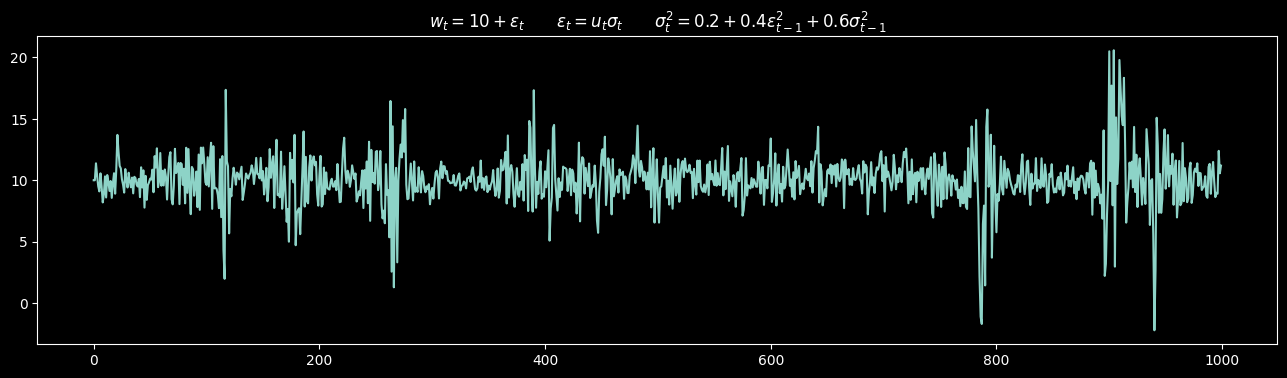

In [ ]:
c, alpha, beta = 10, (0.2, 0.4), 0.6

e = np.zeros_like(u) # El error
𝜎2 = np.ones_like(u) # La varianza

for t in range(2,variable_t):
    𝜎2[t] = alpha[0] + alpha[1]*e[t-1]**2 + beta*𝜎2[t-1]
    e[t] = u[t] * np.sqrt(𝜎2[t])

w = c + e

datos['w'] = w

ax = datos['w'].plot()
ax.set_title("$w_t = 10 + \epsilon_t \qquad \epsilon_t = u_t\sigma_t \qquad \sigma^2_t = 0.2 + 0.4\epsilon^2_{t-1} + 0.6\sigma^2_{t-1}$");

$El \ modelo \ Garch \ (1,1) \  \  \ w_t = 10 + \epsilon_t \qquad \epsilon_t = u_t\sigma_t \qquad \sigma^2_t = 0.2 + 0.4\epsilon^2_{t-1} + 0.6\sigma^2_{t-1}$

### Diagnóstico para la autocorrelación de Garch (1,1)

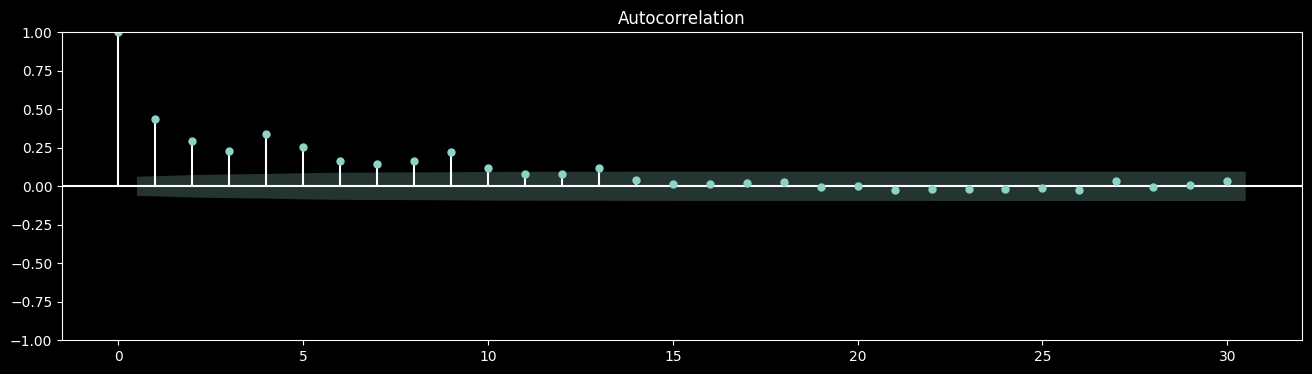

In [ ]:
datos['ew'] = ols('w~1', datos).fit().resid
datos['e2w'] = datos['ew']**2

ax = plot_acf(datos['e2w'])

### Estimación para los valores de los coefcientes GARCH(1,1)

In [ ]:
modelo= arch.arch_model(datos['w'], mean='Constant', vol='garch')
resultados=modelo.fit()
resultados.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3069.4004772701155
Iteration:      2,   Func. Count:     15,   Neg. LLF: 3684.3736654365475
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2318.776141331343
Iteration:      4,   Func. Count:     28,   Neg. LLF: 2583.6871753193473
Iteration:      5,   Func. Count:     35,   Neg. LLF: 1993.913977628172
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1842.1780445853306
Iteration:      7,   Func. Count:     46,   Neg. LLF: 1844.0522730200641
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1841.85724786564
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1841.8214122087898
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1841.8157312057206
Iteration:     11,   Func. Count:     67,   Neg. LLF: 1841.8155139906319
Iteration:     12,   Func. Count:     72,   Neg. LLF: 1841.8155113459225
Iteration:     13,   Func. Count:     76,   Neg. LLF: 1841.8155113460236
Optimization terminated successfully    (Exit mode 0)
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      w   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1841.82
Distribution:                  Normal   AIC:                           3691.63
Method:            Maximum Likelihood   BIC:                           3711.26
                                        No. Observations:                 1000
Date:                Sat, Nov 25 2023   Df Residuals:                      999
Time:                        14:40:59   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            10.0239  3.721e-02    269.377      0.000 [  9.951, 10.097]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.1914  4.462e-02      4.289  1.796e-05 [  0.104,  0.279]
alpha[1]       0.3920  5.232e-02      7.491  6.814e-14 [  0.289,  0.495]
beta[1]        0.5908  3.951e-02     14.953  1.486e-50 [  0.513,  0.668]
========================================================================

Covariance estimator: robust
"""

In [ ]:
# Parámetros estimados
resultados.params

mu          10.023872
omega        0.191380
alpha[1]     0.391956
beta[1]      0.590848
Name: params, dtype: float64

# Simulación de Monte Carlo

## Para el estimador del modelo ARCH

In [ ]:
verdaderos = {'mu': 10.0, 'omega': 0.2, 'alpha[1]': 0.3, 'alpha[2]':0.4}

In [ ]:
def iteracion_arch(mu=10, omega=0.2, alpha1=0.3, alpha2=0.4, T=1000):

    # Genera una muestra de T observaciones del modelo ARCH(2),
    # lo estima y retorna los parámetros estimados

    u = np.random.randn(T)

    e = np.zeros_like(u)
    𝜎2 = np.ones_like(u)

    for t in range(2,T):
        𝜎2[t] = omega + alpha1*e[t-1]**2 + alpha2*e[t-2]**2
        e[t] = u[t] * np.sqrt(𝜎2[t])

    y = mu + e
    return arch.arch_model(y, mean='Constant', vol='arch', p=2).fit().params

In [ ]:
%%capture cap_out --no-stderr

for _ in range(3):
    iteracion_arch()

In [ ]:
%%capture cap_out --no-stderr


simulaciones = pd.concat([iteracion_arch() for _ in range(n_simulaciones)], axis=1).T
simulaciones.index = np.arange(n_simulaciones)

In [ ]:
simulaciones

,mu,omega,alpha[1],alpha[2]
0,9.974678,0.187280,0.323641,0.403176
1,10.013608,0.225794,0.241002,0.309955
2,10.010959,0.263399,0.199948,0.355028
3,10.040139,0.209622,0.268598,0.337607
4,10.011993,0.206786,0.259279,0.492068
...,...,...,...,...
995,10.000560,0.206825,0.285145,0.414661
996,9.999199,0.169098,0.321728,0.458520
997,9.970640,0.206867,0.254762,0.473849
998,10.018530,0.188226,0.268390,0.427171


In [ ]:
promedios = simulaciones.mean()
promedios

mu          10.000963
omega        0.201497
alpha[1]     0.296667
alpha[2]     0.394535
dtype: float64

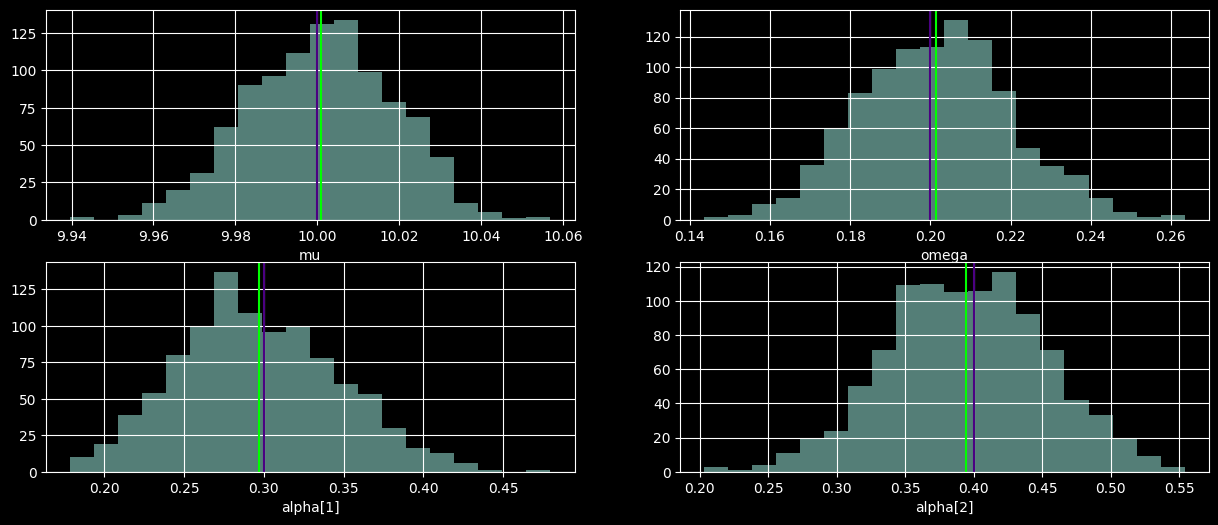

In [ ]:
fig, axs = plt.subplots(2,2,figsize=[15,6])
for variable, ax in zip(simulaciones, axs.flatten()):
    simulaciones[variable].hist(ax=ax,bins=20,alpha=0.6)
    ax.set_xlabel(variable)
    ax.axvline(promedios[variable], color='lime')
    ax.axvline(verdaderos[variable], color='indigo')

## Para el estimador del modelo GARCH

In [ ]:
verdaderos = {'mu': 10.0, 'omega': 0.2, 'alpha[1]': 0.4, 'beta[1]':0.6}

In [ ]:
def iteracion_garch(mu=10, omega=0.2, alpha=0.4, beta=0.6, T=1000):

    # Genera una muestra de T observaciones del modelo GARCH(1,1),
    # lo estima y retorna los parámetros estimados

    u = np.random.randn(T)

    e = np.zeros_like(u)
    𝜎2 = np.ones_like(u)

    for t in range(1,T):
        𝜎2[t] = omega + alpha * e[t-1]**2 + beta*𝜎2[t-1]
        e[t] = u[t] * np.sqrt(𝜎2[t])

    y = mu + e
    return arch.arch_model(y, mean='Constant', vol='garch', p=1, q=1).fit().params

In [ ]:
%%capture cap_out --no-stderr

for _ in range(3):
    iteracion_garch()

In [ ]:
%%capture cap_out --no-stderr


simulaciones = pd.concat([iteracion_garch() for _ in range(n_simulaciones)], axis=1).T
simulaciones.index = np.arange(n_simulaciones)

In [ ]:
simulaciones

,mu,omega,alpha[1],beta[1]
0,9.985423,0.237081,0.394359,0.597878
1,9.998140,0.291996,0.443234,0.556766
2,9.999248,0.200257,0.443369,0.556631
3,10.006645,0.261249,0.435461,0.564539
4,9.976253,0.172241,0.376063,0.615435
...,...,...,...,...
995,10.023755,0.156030,0.348286,0.645847
996,9.984916,0.125142,0.287782,0.684935
997,9.995033,0.279233,0.350994,0.603332
998,9.956437,0.178259,0.396989,0.603011


In [ ]:
promedios = simulaciones.mean()
promedios

mu          9.998440
omega       0.214777
alpha[1]    0.387205
beta[1]     0.598127
dtype: float64

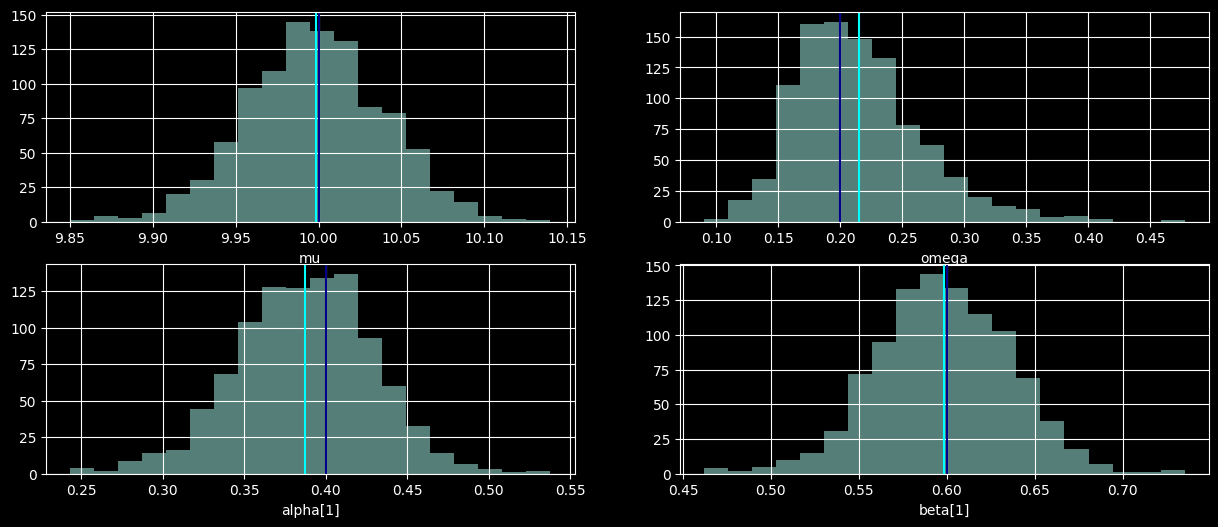

In [ ]:
tfig, axs = plt.subplots(2,2,figsize=[15,6])
for variable, ax in zip(simulaciones, axs.flatten()):
    simulaciones[variable].hist(ax=ax,bins=20,alpha=0.6)
    ax.set_xlabel(variable)
    ax.axvline(promedios[variable], color='cyan')
    ax.axvline(verdaderos[variable], color='darkblue')